In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

2023-11-29 12:30:56.592708: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-29 12:30:56.653450: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 12:30:56.653488: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 12:30:56.654915: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 12:30:56.664380: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.__version__

'2.15.0'

In [3]:
#!pip3 install --upgrade tensorflow

In [4]:
df = pd.read_csv('../ionosphere.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [5]:
df.drop(columns=1,inplace=True)

In [6]:
x = df.iloc[:,:-1]
x

,0,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [7]:
y = df.iloc[:,-1]
y

0      g
1      b
2      g
3      b
4      g
      ..
346    g
347    g
348    g
349    g
350    g
Name: 34, Length: 351, dtype: object

In [8]:
lbl = LabelEncoder()
std = StandardScaler()

In [9]:
x = std.fit_transform(x)
x

array([[ 0.34843328,  0.71237237, -0.23425724, ..., -1.05505394,
        -0.3122206 , -0.99959483],
       [ 0.34843328,  0.72164805, -0.52781074, ..., -0.11521328,
        -0.93260505, -0.08328554],
       [ 0.34843328,  0.72164805, -0.17699842, ..., -0.46409249,
         0.40444328, -0.84859079],
       ...,
       [ 0.34843328,  0.61502805, -0.10143222, ...,  0.01601615,
         1.10669878, -0.04330004],
       [ 0.34843328,  0.53267371, -0.13825118, ..., -0.06586087,
         1.00526528, -0.37828012],
       [ 0.34843328,  0.41400137,  0.20634524, ..., -0.12281796,
         0.9738619 , -0.16248675]])

In [10]:
#y = pd.get_dummies(y).to_numpy()
y = lbl.fit_transform(y)
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
y.shape

(351,)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(x,y,
                                                test_size=0.2,
                                                random_state=24,
                                                stratify=y,
                                                shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((280, 33), (71, 33), (280,), (71,))

In [13]:
type(X_train),type(y_train)

(numpy.ndarray, numpy.ndarray)

In [14]:
knl_reg = tf.keras.regularizers.L2(l2=0.009)

model = tf.keras.Sequential([
    
    
    tf.keras.layers.Dense(20,activation='relu',kernel_regularizer = knl_reg),
    #tf.keras.layers.Dropout(rate=0.05),
    
    tf.keras.layers.Dense(8,activation='relu',kernel_regularizer = knl_reg),
    #tf.keras.layers.Dropout(rate=0.05),
    
    tf.keras.layers.Dense(2,activation='sigmoid')
    
])

In [15]:
#ce_loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
ce_loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [16]:
ALPHA=0.001
optim = tf.keras.optimizers.Adam(learning_rate=ALPHA)

In [17]:
model.compile(optimizer=optim,loss=ce_loss,metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train,
                    validation_data = [X_test,y_test],
                    epochs = 2000,
                    batch_size = 32,
                    verbose = 1
                   )

Epoch 1/2000
9/9 [==============================] - 2s 63ms/step - loss: 1.1370 - accuracy: 0.6500 - val_loss: 1.1313 - val_accuracy: 0.6338
Epoch 2/2000
9/9 [==============================] - 0s 13ms/step - loss: 1.0471 - accuracy: 0.6607 - val_loss: 1.0639 - val_accuracy: 0.6338
Epoch 3/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.9784 - accuracy: 0.6964 - val_loss: 1.0095 - val_accuracy: 0.6620
Epoch 4/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.9273 - accuracy: 0.7250 - val_loss: 0.9637 - val_accuracy: 0.7183
Epoch 5/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.8874 - accuracy: 0.7714 - val_loss: 0.9263 - val_accuracy: 0.7465
Epoch 6/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.8502 - accuracy: 0.7857 - val_loss: 0.8916 - val_accuracy: 0.7324
Epoch 7/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.8163 - accuracy: 0.8071 - val_loss: 0.8596 - val_accuracy: 0.7465
Epoch 8/2000


Epoch 59/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.2466 - accuracy: 0.9786 - val_loss: 0.3002 - val_accuracy: 0.9296
Epoch 60/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.2434 - accuracy: 0.9786 - val_loss: 0.2969 - val_accuracy: 0.9296
Epoch 61/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.2402 - accuracy: 0.9786 - val_loss: 0.2923 - val_accuracy: 0.9296
Epoch 62/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.2366 - accuracy: 0.9786 - val_loss: 0.2867 - val_accuracy: 0.9296
Epoch 63/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.2340 - accuracy: 0.9786 - val_loss: 0.2828 - val_accuracy: 0.9296
Epoch 64/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.2309 - accuracy: 0.9786 - val_loss: 0.2785 - val_accuracy: 0.9296
Epoch 65/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.2283 - accuracy: 0.9786 - val_loss: 0.2747 - val_accuracy: 0.9296
Epoch 

9/9 [==============================] - 0s 12ms/step - loss: 0.1422 - accuracy: 0.9857 - val_loss: 0.1771 - val_accuracy: 0.9859
Epoch 117/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.1421 - accuracy: 0.9857 - val_loss: 0.1754 - val_accuracy: 0.9859
Epoch 118/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.1410 - accuracy: 0.9857 - val_loss: 0.1752 - val_accuracy: 0.9859
Epoch 119/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.1403 - accuracy: 0.9857 - val_loss: 0.1743 - val_accuracy: 0.9859
Epoch 120/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.1399 - accuracy: 0.9857 - val_loss: 0.1727 - val_accuracy: 0.9859
Epoch 121/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.1392 - accuracy: 0.9857 - val_loss: 0.1733 - val_accuracy: 0.9859
Epoch 122/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.1374 - accuracy: 0.9893 - val_loss: 0.1720 - val_accuracy: 0.9859
Epoch 123/2000

9/9 [==============================] - 0s 12ms/step - loss: 0.1091 - accuracy: 0.9929 - val_loss: 0.1524 - val_accuracy: 0.9859
Epoch 174/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.1085 - accuracy: 0.9929 - val_loss: 0.1516 - val_accuracy: 1.0000
Epoch 175/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.1080 - accuracy: 0.9929 - val_loss: 0.1517 - val_accuracy: 1.0000
Epoch 176/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.1076 - accuracy: 0.9929 - val_loss: 0.1524 - val_accuracy: 0.9859
Epoch 177/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.1075 - accuracy: 0.9929 - val_loss: 0.1508 - val_accuracy: 1.0000
Epoch 178/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.1072 - accuracy: 0.9929 - val_loss: 0.1523 - val_accuracy: 0.9859
Epoch 179/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.1065 - accuracy: 0.9929 - val_loss: 0.1519 - val_accuracy: 0.9859
Epoch 180/2000

9/9 [==============================] - 0s 13ms/step - loss: 0.0909 - accuracy: 0.9964 - val_loss: 0.1454 - val_accuracy: 0.9859
Epoch 231/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0902 - accuracy: 0.9964 - val_loss: 0.1475 - val_accuracy: 0.9718
Epoch 232/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0900 - accuracy: 0.9964 - val_loss: 0.1499 - val_accuracy: 0.9718
Epoch 233/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0896 - accuracy: 0.9964 - val_loss: 0.1494 - val_accuracy: 0.9718
Epoch 234/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0897 - accuracy: 0.9964 - val_loss: 0.1450 - val_accuracy: 0.9859
Epoch 235/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0893 - accuracy: 0.9964 - val_loss: 0.1468 - val_accuracy: 0.9718
Epoch 236/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0892 - accuracy: 0.9964 - val_loss: 0.1466 - val_accuracy: 0.9718
Epoch 237/2000

9/9 [==============================] - 0s 10ms/step - loss: 0.0793 - accuracy: 0.9964 - val_loss: 0.1460 - val_accuracy: 0.9859
Epoch 288/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0795 - accuracy: 0.9964 - val_loss: 0.1506 - val_accuracy: 0.9718
Epoch 289/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0793 - accuracy: 0.9964 - val_loss: 0.1483 - val_accuracy: 0.9859
Epoch 290/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0792 - accuracy: 0.9964 - val_loss: 0.1465 - val_accuracy: 0.9718
Epoch 291/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0786 - accuracy: 0.9964 - val_loss: 0.1472 - val_accuracy: 0.9859
Epoch 292/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0792 - accuracy: 0.9964 - val_loss: 0.1527 - val_accuracy: 0.9718
Epoch 293/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0780 - accuracy: 0.9964 - val_loss: 0.1493 - val_accuracy: 0.9718
Epoch 294/2000

9/9 [==============================] - 0s 13ms/step - loss: 0.0725 - accuracy: 0.9964 - val_loss: 0.1582 - val_accuracy: 0.9577
Epoch 345/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0721 - accuracy: 0.9964 - val_loss: 0.1570 - val_accuracy: 0.9718
Epoch 346/2000
9/9 [==============================] - 0s 10ms/step - loss: 0.0722 - accuracy: 0.9964 - val_loss: 0.1526 - val_accuracy: 0.9718
Epoch 347/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0711 - accuracy: 0.9964 - val_loss: 0.1515 - val_accuracy: 0.9718
Epoch 348/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.0725 - accuracy: 0.9964 - val_loss: 0.1497 - val_accuracy: 0.9859
Epoch 349/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0729 - accuracy: 0.9964 - val_loss: 0.1554 - val_accuracy: 0.9577
Epoch 350/2000
9/9 [==============================] - 0s 9ms/step - loss: 0.0706 - accuracy: 0.9964 - val_loss: 0.1582 - val_accuracy: 0.9437
Epoch 351/2000


9/9 [==============================] - 0s 10ms/step - loss: 0.0654 - accuracy: 0.9964 - val_loss: 0.1594 - val_accuracy: 0.9718
Epoch 402/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0661 - accuracy: 0.9964 - val_loss: 0.1584 - val_accuracy: 0.9718
Epoch 403/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.0663 - accuracy: 0.9964 - val_loss: 0.1585 - val_accuracy: 0.9577
Epoch 404/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0656 - accuracy: 0.9964 - val_loss: 0.1650 - val_accuracy: 0.9577
Epoch 405/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0659 - accuracy: 0.9964 - val_loss: 0.1564 - val_accuracy: 0.9577
Epoch 406/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0652 - accuracy: 0.9964 - val_loss: 0.1607 - val_accuracy: 0.9577
Epoch 407/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0650 - accuracy: 0.9964 - val_loss: 0.1682 - val_accuracy: 0.9437
Epoch 408/2000

9/9 [==============================] - 0s 12ms/step - loss: 0.0611 - accuracy: 0.9964 - val_loss: 0.1727 - val_accuracy: 0.9577
Epoch 459/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0611 - accuracy: 0.9964 - val_loss: 0.1767 - val_accuracy: 0.9437
Epoch 460/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0608 - accuracy: 0.9964 - val_loss: 0.1756 - val_accuracy: 0.9577
Epoch 461/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0605 - accuracy: 0.9964 - val_loss: 0.1720 - val_accuracy: 0.9437
Epoch 462/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0609 - accuracy: 0.9964 - val_loss: 0.1687 - val_accuracy: 0.9437
Epoch 463/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0606 - accuracy: 0.9964 - val_loss: 0.1800 - val_accuracy: 0.9437
Epoch 464/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0607 - accuracy: 0.9964 - val_loss: 0.1760 - val_accuracy: 0.9577
Epoch 465/2000

9/9 [==============================] - 0s 12ms/step - loss: 0.0582 - accuracy: 0.9964 - val_loss: 0.1768 - val_accuracy: 0.9437
Epoch 516/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0572 - accuracy: 0.9964 - val_loss: 0.1983 - val_accuracy: 0.9437
Epoch 517/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0569 - accuracy: 0.9964 - val_loss: 0.1830 - val_accuracy: 0.9437
Epoch 518/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0572 - accuracy: 0.9964 - val_loss: 0.1846 - val_accuracy: 0.9437
Epoch 519/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0565 - accuracy: 0.9964 - val_loss: 0.1979 - val_accuracy: 0.9437
Epoch 520/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0568 - accuracy: 0.9964 - val_loss: 0.1895 - val_accuracy: 0.9437
Epoch 521/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0572 - accuracy: 0.9964 - val_loss: 0.1811 - val_accuracy: 0.9437
Epoch 522/2000

9/9 [==============================] - 0s 12ms/step - loss: 0.0535 - accuracy: 0.9964 - val_loss: 0.1949 - val_accuracy: 0.9437
Epoch 573/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0537 - accuracy: 0.9964 - val_loss: 0.2079 - val_accuracy: 0.9437
Epoch 574/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.0539 - accuracy: 0.9964 - val_loss: 0.1996 - val_accuracy: 0.9296
Epoch 575/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0535 - accuracy: 0.9964 - val_loss: 0.1966 - val_accuracy: 0.9437
Epoch 576/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0533 - accuracy: 0.9964 - val_loss: 0.2088 - val_accuracy: 0.9437
Epoch 577/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0541 - accuracy: 0.9964 - val_loss: 0.2140 - val_accuracy: 0.9155
Epoch 578/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0543 - accuracy: 0.9964 - val_loss: 0.1897 - val_accuracy: 0.9437
Epoch 579/2000

9/9 [==============================] - 0s 12ms/step - loss: 0.0506 - accuracy: 0.9964 - val_loss: 0.1943 - val_accuracy: 0.9437
Epoch 630/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0523 - accuracy: 0.9929 - val_loss: 0.1888 - val_accuracy: 0.9437
Epoch 631/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0502 - accuracy: 0.9964 - val_loss: 0.2264 - val_accuracy: 0.9155
Epoch 632/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0509 - accuracy: 0.9964 - val_loss: 0.2099 - val_accuracy: 0.9296
Epoch 633/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0515 - accuracy: 0.9964 - val_loss: 0.1953 - val_accuracy: 0.9437
Epoch 634/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0510 - accuracy: 0.9964 - val_loss: 0.2213 - val_accuracy: 0.9296
Epoch 635/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0507 - accuracy: 0.9964 - val_loss: 0.1991 - val_accuracy: 0.9296
Epoch 636/2000

9/9 [==============================] - 0s 12ms/step - loss: 0.0477 - accuracy: 0.9964 - val_loss: 0.2232 - val_accuracy: 0.9296
Epoch 687/2000
9/9 [==============================] - 0s 14ms/step - loss: 0.0480 - accuracy: 0.9964 - val_loss: 0.2189 - val_accuracy: 0.9296
Epoch 688/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0476 - accuracy: 0.9964 - val_loss: 0.2134 - val_accuracy: 0.9296
Epoch 689/2000
9/9 [==============================] - 0s 9ms/step - loss: 0.0478 - accuracy: 0.9964 - val_loss: 0.2170 - val_accuracy: 0.9296
Epoch 690/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0476 - accuracy: 0.9964 - val_loss: 0.2149 - val_accuracy: 0.9296
Epoch 691/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0478 - accuracy: 0.9964 - val_loss: 0.2210 - val_accuracy: 0.9437
Epoch 692/2000
9/9 [==============================] - 0s 10ms/step - loss: 0.0478 - accuracy: 0.9964 - val_loss: 0.2075 - val_accuracy: 0.9437
Epoch 693/2000


9/9 [==============================] - 0s 12ms/step - loss: 0.0457 - accuracy: 1.0000 - val_loss: 0.2355 - val_accuracy: 0.9437
Epoch 744/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0459 - accuracy: 0.9964 - val_loss: 0.2240 - val_accuracy: 0.9296
Epoch 745/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0453 - accuracy: 1.0000 - val_loss: 0.2288 - val_accuracy: 0.9296
Epoch 746/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0457 - accuracy: 1.0000 - val_loss: 0.2351 - val_accuracy: 0.9296
Epoch 747/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0464 - accuracy: 0.9964 - val_loss: 0.2423 - val_accuracy: 0.9437
Epoch 748/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0451 - accuracy: 1.0000 - val_loss: 0.2109 - val_accuracy: 0.9437
Epoch 749/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0462 - accuracy: 1.0000 - val_loss: 0.2150 - val_accuracy: 0.9296
Epoch 750/2000

9/9 [==============================] - 0s 12ms/step - loss: 0.0437 - accuracy: 0.9964 - val_loss: 0.2546 - val_accuracy: 0.9296
Epoch 801/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0436 - accuracy: 0.9964 - val_loss: 0.2386 - val_accuracy: 0.9296
Epoch 802/2000
9/9 [==============================] - 0s 10ms/step - loss: 0.0436 - accuracy: 0.9964 - val_loss: 0.2409 - val_accuracy: 0.9296
Epoch 803/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0435 - accuracy: 1.0000 - val_loss: 0.2458 - val_accuracy: 0.9155
Epoch 804/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0434 - accuracy: 1.0000 - val_loss: 0.2490 - val_accuracy: 0.9296
Epoch 805/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0435 - accuracy: 0.9964 - val_loss: 0.2566 - val_accuracy: 0.9296
Epoch 806/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0433 - accuracy: 1.0000 - val_loss: 0.2417 - val_accuracy: 0.9296
Epoch 807/2000

9/9 [==============================] - 0s 11ms/step - loss: 0.0444 - accuracy: 0.9964 - val_loss: 0.2286 - val_accuracy: 0.9296
Epoch 858/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0441 - accuracy: 1.0000 - val_loss: 0.2344 - val_accuracy: 0.9296
Epoch 859/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0433 - accuracy: 0.9964 - val_loss: 0.2429 - val_accuracy: 0.9296
Epoch 860/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0427 - accuracy: 0.9964 - val_loss: 0.2320 - val_accuracy: 0.9296
Epoch 861/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.0419 - accuracy: 1.0000 - val_loss: 0.2474 - val_accuracy: 0.9296
Epoch 862/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0422 - accuracy: 0.9964 - val_loss: 0.2563 - val_accuracy: 0.9296
Epoch 863/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0426 - accuracy: 1.0000 - val_loss: 0.2233 - val_accuracy: 0.9296
Epoch 864/2000

9/9 [==============================] - 0s 12ms/step - loss: 0.0401 - accuracy: 1.0000 - val_loss: 0.2558 - val_accuracy: 0.9296
Epoch 915/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 0.2608 - val_accuracy: 0.9437
Epoch 916/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0406 - accuracy: 0.9964 - val_loss: 0.2508 - val_accuracy: 0.9296
Epoch 917/2000
9/9 [==============================] - 0s 10ms/step - loss: 0.0403 - accuracy: 1.0000 - val_loss: 0.2671 - val_accuracy: 0.9296
Epoch 918/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0405 - accuracy: 1.0000 - val_loss: 0.2414 - val_accuracy: 0.9296
Epoch 919/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0403 - accuracy: 1.0000 - val_loss: 0.2777 - val_accuracy: 0.9296
Epoch 920/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0401 - accuracy: 0.9964 - val_loss: 0.2655 - val_accuracy: 0.9437
Epoch 921/2000

9/9 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 1.0000 - val_loss: 0.2597 - val_accuracy: 0.9296
Epoch 972/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0384 - accuracy: 1.0000 - val_loss: 0.2673 - val_accuracy: 0.9296
Epoch 973/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 0.2681 - val_accuracy: 0.9437
Epoch 974/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0384 - accuracy: 1.0000 - val_loss: 0.2655 - val_accuracy: 0.9296
Epoch 975/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0390 - accuracy: 0.9964 - val_loss: 0.2669 - val_accuracy: 0.9437
Epoch 976/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 0.2583 - val_accuracy: 0.9296
Epoch 977/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0404 - accuracy: 0.9964 - val_loss: 0.2680 - val_accuracy: 0.9155
Epoch 978/2000

9/9 [==============================] - 0s 12ms/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 0.2923 - val_accuracy: 0.9296
Epoch 1029/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0377 - accuracy: 1.0000 - val_loss: 0.2791 - val_accuracy: 0.9437
Epoch 1030/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0371 - accuracy: 1.0000 - val_loss: 0.2972 - val_accuracy: 0.9155
Epoch 1031/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0374 - accuracy: 1.0000 - val_loss: 0.2858 - val_accuracy: 0.9296
Epoch 1032/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0373 - accuracy: 1.0000 - val_loss: 0.2841 - val_accuracy: 0.9296
Epoch 1033/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0368 - accuracy: 1.0000 - val_loss: 0.2962 - val_accuracy: 0.9437
Epoch 1034/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0374 - accuracy: 1.0000 - val_loss: 0.2761 - val_accuracy: 0.9437
Epoch 10

9/9 [==============================] - 0s 12ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 0.2740 - val_accuracy: 0.9155
Epoch 1086/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 1.0000 - val_loss: 0.2855 - val_accuracy: 0.9296
Epoch 1087/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 0.2814 - val_accuracy: 0.9155
Epoch 1088/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 1.0000 - val_loss: 0.2729 - val_accuracy: 0.9155
Epoch 1089/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.2781 - val_accuracy: 0.9155
Epoch 1090/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.2938 - val_accuracy: 0.9296
Epoch 1091/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 1.0000 - val_loss: 0.2839 - val_accuracy: 0.9296
Epoch 10

9/9 [==============================] - 0s 12ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 0.2729 - val_accuracy: 0.9296
Epoch 1143/2000
9/9 [==============================] - 0s 10ms/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 0.2985 - val_accuracy: 0.9155
Epoch 1144/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0350 - accuracy: 1.0000 - val_loss: 0.2871 - val_accuracy: 0.9296
Epoch 1145/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 1.0000 - val_loss: 0.2759 - val_accuracy: 0.9296
Epoch 1146/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0348 - accuracy: 1.0000 - val_loss: 0.2900 - val_accuracy: 0.9296
Epoch 1147/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 1.0000 - val_loss: 0.2945 - val_accuracy: 0.9155
Epoch 1148/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 0.2916 - val_accuracy: 0.9296
Epoch 11

9/9 [==============================] - 0s 11ms/step - loss: 0.0338 - accuracy: 1.0000 - val_loss: 0.2847 - val_accuracy: 0.9296
Epoch 1200/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0340 - accuracy: 1.0000 - val_loss: 0.2935 - val_accuracy: 0.9296
Epoch 1201/2000
9/9 [==============================] - 0s 14ms/step - loss: 0.0348 - accuracy: 1.0000 - val_loss: 0.3233 - val_accuracy: 0.9155
Epoch 1202/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.0341 - accuracy: 1.0000 - val_loss: 0.2863 - val_accuracy: 0.9296
Epoch 1203/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0340 - accuracy: 1.0000 - val_loss: 0.3142 - val_accuracy: 0.9155
Epoch 1204/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 0.2940 - val_accuracy: 0.9296
Epoch 1205/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0340 - accuracy: 1.0000 - val_loss: 0.2941 - val_accuracy: 0.9296
Epoch 12

9/9 [==============================] - 0s 11ms/step - loss: 0.0331 - accuracy: 1.0000 - val_loss: 0.3050 - val_accuracy: 0.9296
Epoch 1257/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0333 - accuracy: 1.0000 - val_loss: 0.3087 - val_accuracy: 0.9296
Epoch 1258/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.3037 - val_accuracy: 0.9155
Epoch 1259/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 0.3144 - val_accuracy: 0.9296
Epoch 1260/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 0.3122 - val_accuracy: 0.9296
Epoch 1261/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.0332 - accuracy: 1.0000 - val_loss: 0.2798 - val_accuracy: 0.9296
Epoch 1262/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0330 - accuracy: 1.0000 - val_loss: 0.3078 - val_accuracy: 0.9296
Epoch 12

9/9 [==============================] - 0s 12ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 0.3208 - val_accuracy: 0.9296
Epoch 1314/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 0.3021 - val_accuracy: 0.9296
Epoch 1315/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 0.3127 - val_accuracy: 0.9296
Epoch 1316/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.3184 - val_accuracy: 0.9296
Epoch 1317/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.3054 - val_accuracy: 0.9296
Epoch 1318/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 0.3030 - val_accuracy: 0.9296
Epoch 1319/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.0322 - accuracy: 1.0000 - val_loss: 0.3094 - val_accuracy: 0.9296
Epoch 13

9/9 [==============================] - 0s 12ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 0.3184 - val_accuracy: 0.9296
Epoch 1371/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0313 - accuracy: 1.0000 - val_loss: 0.3277 - val_accuracy: 0.9296
Epoch 1372/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0310 - accuracy: 1.0000 - val_loss: 0.2996 - val_accuracy: 0.9296
Epoch 1373/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0311 - accuracy: 1.0000 - val_loss: 0.3022 - val_accuracy: 0.9155
Epoch 1374/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0315 - accuracy: 1.0000 - val_loss: 0.3121 - val_accuracy: 0.9296
Epoch 1375/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0308 - accuracy: 1.0000 - val_loss: 0.3094 - val_accuracy: 0.9155
Epoch 1376/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0310 - accuracy: 1.0000 - val_loss: 0.3292 - val_accuracy: 0.9155
Epoch 13

9/9 [==============================] - 0s 11ms/step - loss: 0.0305 - accuracy: 1.0000 - val_loss: 0.3015 - val_accuracy: 0.9155
Epoch 1428/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0307 - accuracy: 1.0000 - val_loss: 0.3121 - val_accuracy: 0.9155
Epoch 1429/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0310 - accuracy: 1.0000 - val_loss: 0.3091 - val_accuracy: 0.9155
Epoch 1430/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0305 - accuracy: 1.0000 - val_loss: 0.3395 - val_accuracy: 0.9296
Epoch 1431/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0307 - accuracy: 1.0000 - val_loss: 0.3162 - val_accuracy: 0.9155
Epoch 1432/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0309 - accuracy: 1.0000 - val_loss: 0.3138 - val_accuracy: 0.9155
Epoch 1433/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0321 - accuracy: 0.9964 - val_loss: 0.3266 - val_accuracy: 0.9296
Epoch 14

9/9 [==============================] - 0s 12ms/step - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.3194 - val_accuracy: 0.9155
Epoch 1485/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0299 - accuracy: 1.0000 - val_loss: 0.3167 - val_accuracy: 0.9155
Epoch 1486/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 0.3159 - val_accuracy: 0.9155
Epoch 1487/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.3259 - val_accuracy: 0.9296
Epoch 1488/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.2992 - val_accuracy: 0.9155
Epoch 1489/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0300 - accuracy: 1.0000 - val_loss: 0.3130 - val_accuracy: 0.9155
Epoch 1490/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.3195 - val_accuracy: 0.9296
Epoch 14

9/9 [==============================] - 0s 12ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.3341 - val_accuracy: 0.9296
Epoch 1542/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0300 - accuracy: 1.0000 - val_loss: 0.2945 - val_accuracy: 0.9155
Epoch 1543/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0300 - accuracy: 1.0000 - val_loss: 0.3443 - val_accuracy: 0.9296
Epoch 1544/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 0.3107 - val_accuracy: 0.9155
Epoch 1545/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.0291 - accuracy: 1.0000 - val_loss: 0.3177 - val_accuracy: 0.9155
Epoch 1546/2000
9/9 [==============================] - 0s 14ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 0.3612 - val_accuracy: 0.9155
Epoch 1547/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.2805 - val_accuracy: 0.9296
Epoch 15

9/9 [==============================] - 0s 11ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 0.3414 - val_accuracy: 0.9296
Epoch 1599/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0286 - accuracy: 1.0000 - val_loss: 0.3267 - val_accuracy: 0.9296
Epoch 1600/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0282 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 0.9296
Epoch 1601/2000
9/9 [==============================] - 0s 10ms/step - loss: 0.0283 - accuracy: 1.0000 - val_loss: 0.3223 - val_accuracy: 0.9296
Epoch 1602/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0285 - accuracy: 1.0000 - val_loss: 0.3324 - val_accuracy: 0.9296
Epoch 1603/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0284 - accuracy: 1.0000 - val_loss: 0.3021 - val_accuracy: 0.9155
Epoch 1604/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0282 - accuracy: 1.0000 - val_loss: 0.3557 - val_accuracy: 0.9296
Epoch 16

9/9 [==============================] - 0s 11ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 0.3257 - val_accuracy: 0.9155
Epoch 1656/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 0.3407 - val_accuracy: 0.9296
Epoch 1657/2000
9/9 [==============================] - 0s 15ms/step - loss: 0.0278 - accuracy: 1.0000 - val_loss: 0.3228 - val_accuracy: 0.9155
Epoch 1658/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 0.3400 - val_accuracy: 0.9296
Epoch 1659/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 0.3448 - val_accuracy: 0.9296
Epoch 1660/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 0.3207 - val_accuracy: 0.9155
Epoch 1661/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 0.3340 - val_accuracy: 0.9296
Epoch 16

9/9 [==============================] - 0s 12ms/step - loss: 0.0271 - accuracy: 1.0000 - val_loss: 0.3218 - val_accuracy: 0.9296
Epoch 1713/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0271 - accuracy: 1.0000 - val_loss: 0.3248 - val_accuracy: 0.9296
Epoch 1714/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 0.3388 - val_accuracy: 0.9296
Epoch 1715/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 0.3306 - val_accuracy: 0.9155
Epoch 1716/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0271 - accuracy: 1.0000 - val_loss: 0.3204 - val_accuracy: 0.9155
Epoch 1717/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 0.3269 - val_accuracy: 0.9296
Epoch 1718/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 0.3220 - val_accuracy: 0.9296
Epoch 17

9/9 [==============================] - 0s 12ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 0.3287 - val_accuracy: 0.9296
Epoch 1770/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 0.3225 - val_accuracy: 0.9155
Epoch 1771/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0263 - accuracy: 1.0000 - val_loss: 0.3408 - val_accuracy: 0.9155
Epoch 1772/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 0.3344 - val_accuracy: 0.9296
Epoch 1773/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0264 - accuracy: 1.0000 - val_loss: 0.3198 - val_accuracy: 0.9296
Epoch 1774/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0264 - accuracy: 1.0000 - val_loss: 0.3222 - val_accuracy: 0.9296
Epoch 1775/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 0.3208 - val_accuracy: 0.9155
Epoch 17

9/9 [==============================] - 0s 11ms/step - loss: 0.0283 - accuracy: 1.0000 - val_loss: 0.3568 - val_accuracy: 0.9296
Epoch 1827/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 0.2869 - val_accuracy: 0.9155
Epoch 1828/2000
9/9 [==============================] - 0s 13ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 0.3142 - val_accuracy: 0.9155
Epoch 1829/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 0.3626 - val_accuracy: 0.9296
Epoch 1830/2000
9/9 [==============================] - 0s 11ms/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 0.3442 - val_accuracy: 0.9296
Epoch 1831/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0264 - accuracy: 1.0000 - val_loss: 0.3199 - val_accuracy: 0.9155
Epoch 1832/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 0.3520 - val_accuracy: 0.9296
Epoch 18

9/9 [==============================] - 0s 12ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 0.3471 - val_accuracy: 0.9296
Epoch 1884/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.3288 - val_accuracy: 0.9155
Epoch 1885/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.3292 - val_accuracy: 0.9155
Epoch 1886/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.3478 - val_accuracy: 0.9296
Epoch 1887/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.3252 - val_accuracy: 0.9155
Epoch 1888/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.3393 - val_accuracy: 0.9296
Epoch 1889/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 0.3396 - val_accuracy: 0.9296
Epoch 18

9/9 [==============================] - 0s 12ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.3294 - val_accuracy: 0.9155
Epoch 1941/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.3095 - val_accuracy: 0.9155
Epoch 1942/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.3392 - val_accuracy: 0.9296
Epoch 1943/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 0.3262 - val_accuracy: 0.9296
Epoch 1944/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.3203 - val_accuracy: 0.9155
Epoch 1945/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.3570 - val_accuracy: 0.9296
Epoch 1946/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.3337 - val_accuracy: 0.9296
Epoch 19

9/9 [==============================] - 0s 11ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.3146 - val_accuracy: 0.9437
Epoch 1998/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.3118 - val_accuracy: 0.9296
Epoch 1999/2000
9/9 [==============================] - 0s 12ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.3123 - val_accuracy: 0.9296
Epoch 2000/2000
9/9 [==============================] - 0s 15ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.3156 - val_accuracy: 0.9296


In [19]:
loss_df = pd.DataFrame(history.history)

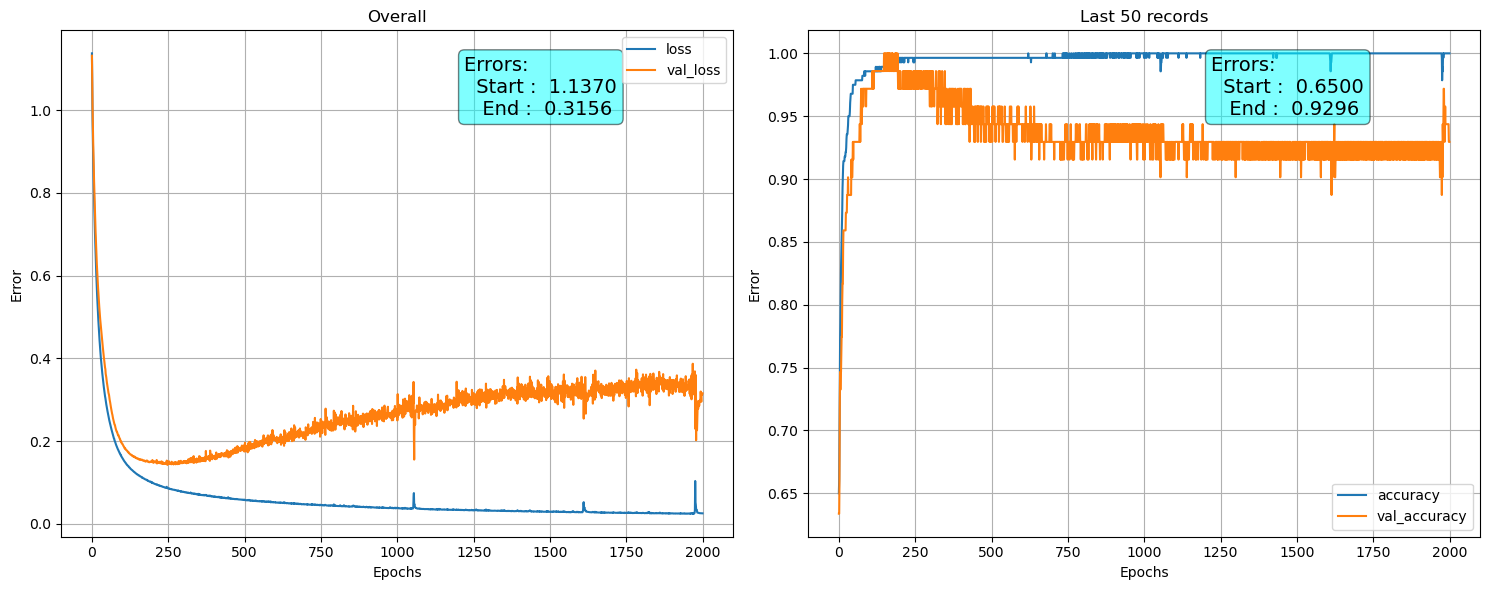

In [20]:
fig, axes = plt.subplots(1,2 , figsize = (15,6))

l_range = 50

ax = axes[0]


ax = axes[0]
y1 = loss_df.columns[0]
y2 = loss_df.columns[2]

loss_df.plot(y = [y1,y2], ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[0][y1],
                                                                loss_df.iloc[-1][y2]) #text to plot

# properties  matplotlib.patch.Patch
props = dict(boxstyle='round', facecolor='aqua', alpha=0.5)

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Overall')
ax.grid();


y1 = loss_df.columns[1]
y2 = loss_df.columns[3]

ax = axes[1]

loss_df.plot(y = [y1,y2], ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[0][y1],
                                                                loss_df.iloc[-1][y2]) #text to plot

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Last {} records'.format(l_range))
ax.grid();
plt.tight_layout()

In [21]:
loss_df = pd.DataFrame(history.history)

In [22]:
loss_df[loss_df['val_loss'] == (loss_df['val_loss'].min())]

,loss,accuracy,val_loss,val_accuracy
247,0.086835,0.992857,0.142627,0.985915
